In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

DATA CLEANING

In [39]:
df = pd.read_csv("covid.csv")

df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,AFG
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,ALB
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,DZA
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,AND
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,AGO
...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,ESH
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,YEM
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,ZMB


In [40]:
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
iso_alpha         0
dtype: int64

In [41]:
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
df.dtypes

Date              datetime64[ns]
Country/Region            object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
New cases                  int64
New deaths                 int64
New recovered              int64
WHO Region                object
iso_alpha                 object
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
 10  iso_alpha       35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 3.0+ MB


In [13]:
df.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2020-04-24 12:00:00,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,2020-06-10 06:00:00,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000
std,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852


DATA VISUALIZATION

In [43]:
unique_countries = df['Country/Region'].unique()

unique_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [18]:
global_trends = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'New cases': 'sum',
    'New deaths': 'sum',
    'New recovered': 'sum'
}).reset_index()

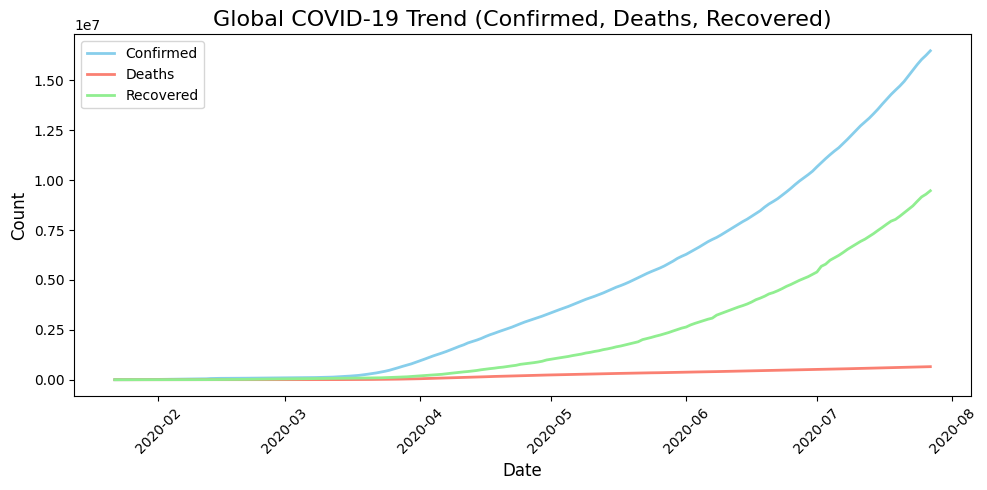

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(global_trends['Date'], global_trends['Confirmed'], label='Confirmed', color='skyblue', linewidth=2)
plt.plot(global_trends['Date'], global_trends['Deaths'], label='Deaths', color='salmon', linewidth=2)
plt.plot(global_trends['Date'], global_trends['Recovered'], label='Recovered', color='lightgreen', linewidth=2)

plt.title('Global COVID-19 Trend (Confirmed, Deaths, Recovered)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
latest_data = df[df['Date'] == df['Date'].max()]  
latest_data_sorted = latest_data.sort_values(by='New cases', ascending=False)

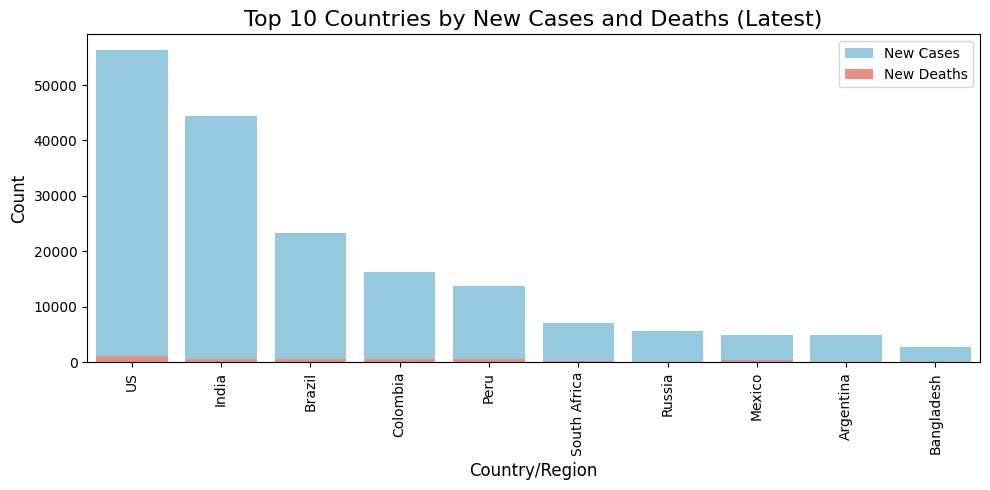

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Country/Region', y='New cases', data=latest_data_sorted.head(10), color='skyblue', label='New Cases')
sns.barplot(x='Country/Region', y='New deaths', data=latest_data_sorted.head(10), color='salmon', label='New Deaths')

plt.title('Top 10 Countries by New Cases and Deaths (Latest)', fontsize=16)
plt.xlabel('Country/Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
region_data = df.groupby('WHO Region').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max'
}).reset_index()

<Figure size 1000x800 with 0 Axes>

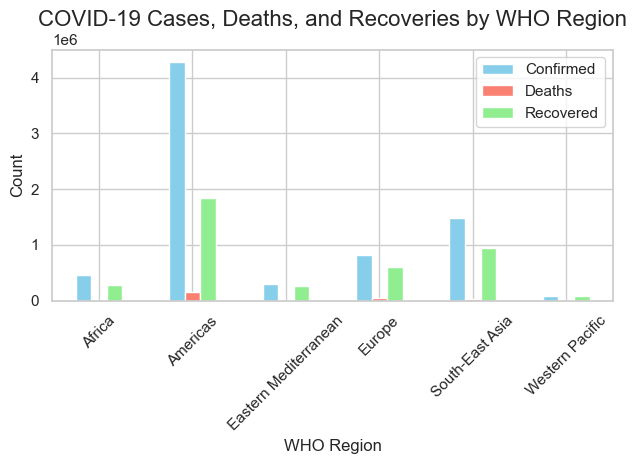

In [82]:
plt.figure(figsize=(10, 8))
region_data.set_index('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].plot(kind='bar', stacked=False, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('COVID-19 Cases, Deaths, and Recoveries by WHO Region', fontsize=16)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

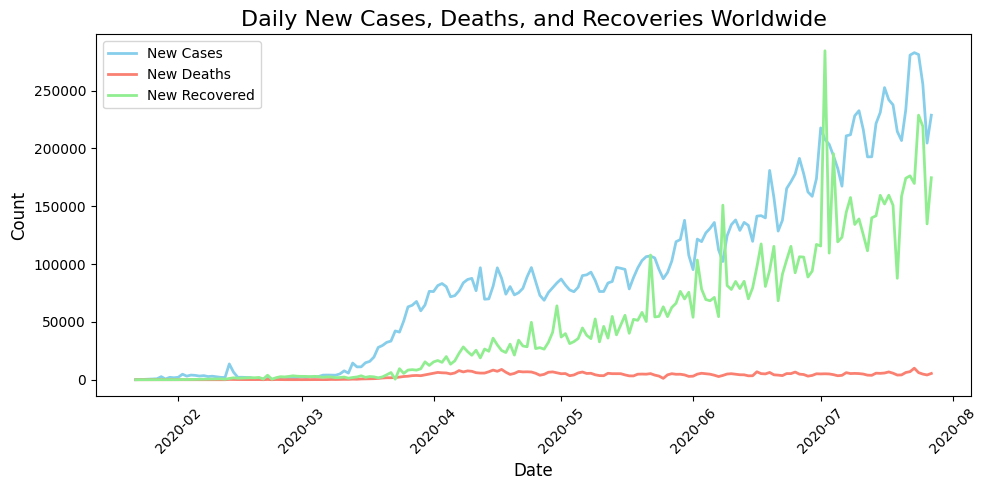

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(global_trends['Date'], global_trends['New cases'], label='New Cases', color='skyblue', linewidth=2)
plt.plot(global_trends['Date'], global_trends['New deaths'], label='New Deaths', color='salmon', linewidth=2)
plt.plot(global_trends['Date'], global_trends['New recovered'], label='New Recovered', color='lightgreen', linewidth=2)

plt.title('Daily New Cases, Deaths, and Recoveries Worldwide', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
top_10_confirmed = df.groupby('Country/Region').agg({'Confirmed': 'max'}).sort_values(by='Confirmed', ascending=False).head(10)

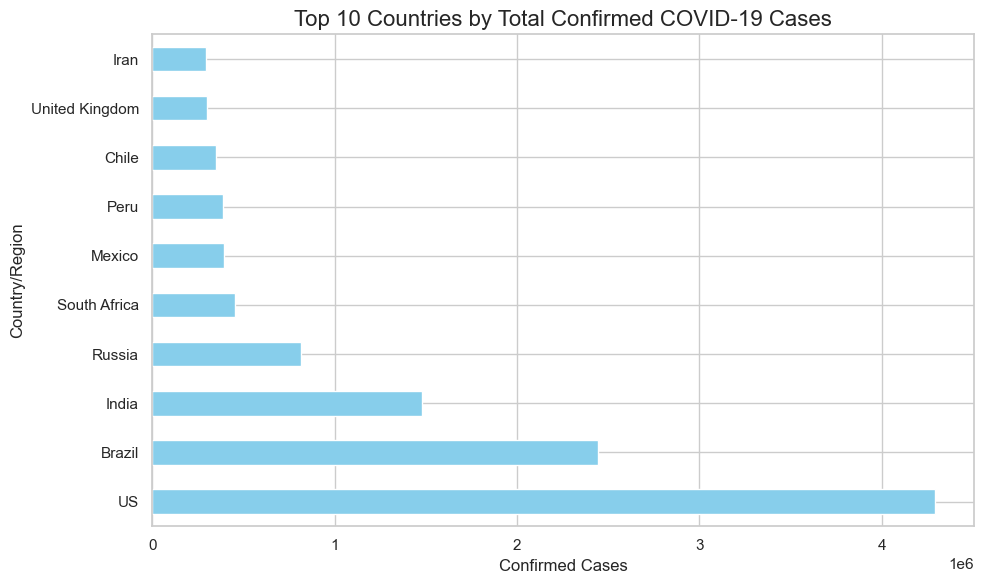

In [47]:
plt.figure(figsize=(10, 6))
top_10_confirmed['Confirmed'].plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.tight_layout()
plt.show()

In [51]:
top_10_deaths_confirmed = df.groupby('Country/Region').agg({'Confirmed': 'max', 'Deaths': 'max'}).sort_values(by='Confirmed', ascending=False).head(10)

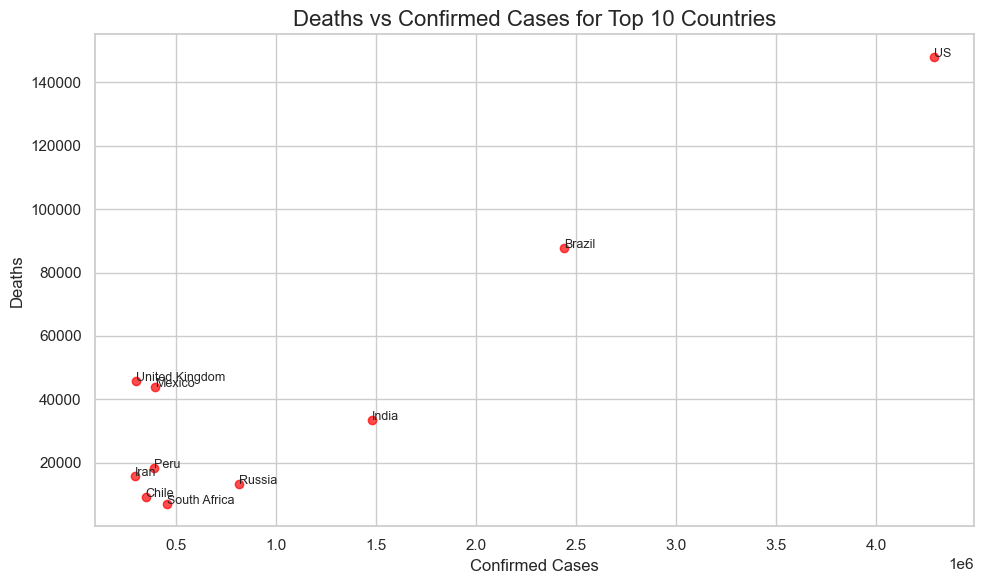

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(top_10_deaths_confirmed['Confirmed'], top_10_deaths_confirmed['Deaths'], color='red', alpha=0.7)
plt.title('Deaths vs Confirmed Cases for Top 10 Countries', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Deaths', fontsize=12)
for i, country in enumerate(top_10_deaths_confirmed.index):
    plt.text(top_10_deaths_confirmed['Confirmed'][i], top_10_deaths_confirmed['Deaths'][i], country, fontsize=9)
plt.tight_layout()
plt.show()

In [53]:
top_10_recovered_confirmed = df.groupby('Country/Region').agg({'Confirmed': 'max', 'Recovered': 'max'}).sort_values(by='Confirmed', ascending=False).head(10)

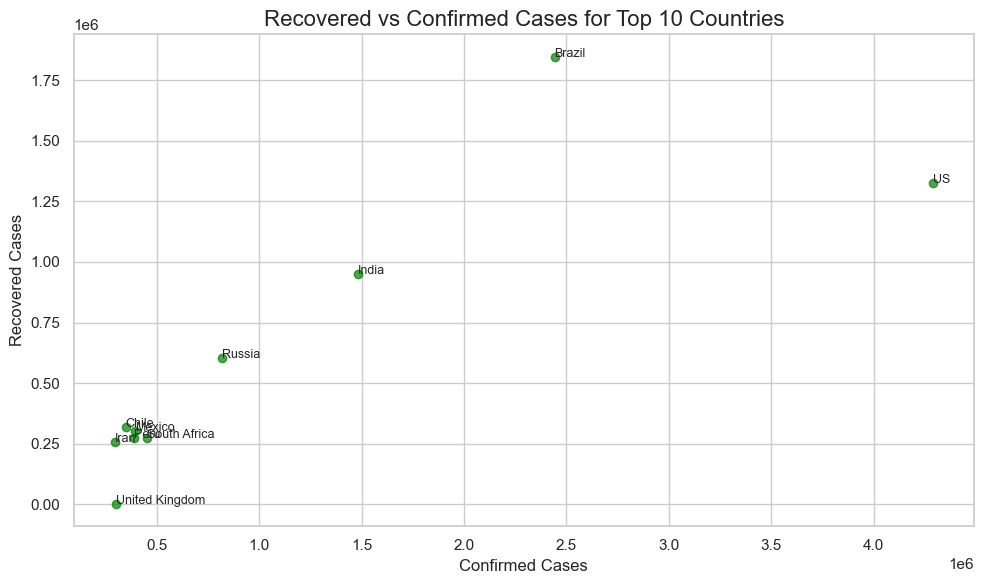

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(top_10_recovered_confirmed['Confirmed'], top_10_recovered_confirmed['Recovered'], color='green', alpha=0.7)
plt.title('Recovered vs Confirmed Cases for Top 10 Countries', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Recovered Cases', fontsize=12)
for i, country in enumerate(top_10_recovered_confirmed.index):
    plt.text(top_10_recovered_confirmed['Confirmed'][i], top_10_recovered_confirmed['Recovered'][i], country, fontsize=9)
plt.tight_layout()
plt.show()

In [55]:
global_new_cases = df.groupby('Date')['New cases'].sum().reset_index()

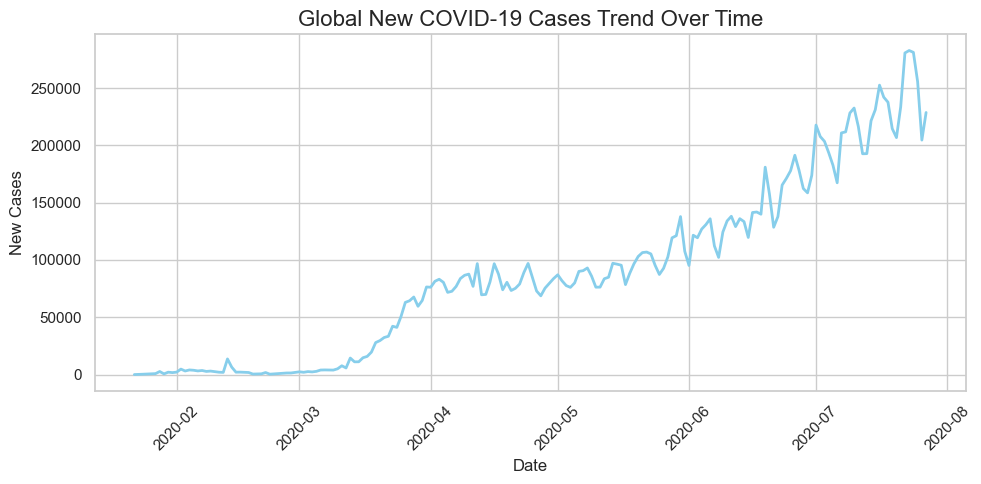

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(global_new_cases['Date'], global_new_cases['New cases'], color='skyblue', linewidth=2)
plt.title('Global New COVID-19 Cases Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
top_10_active = df.groupby('Country/Region').agg({'Active': 'max'}).sort_values(by='Active', ascending=False).head(10)

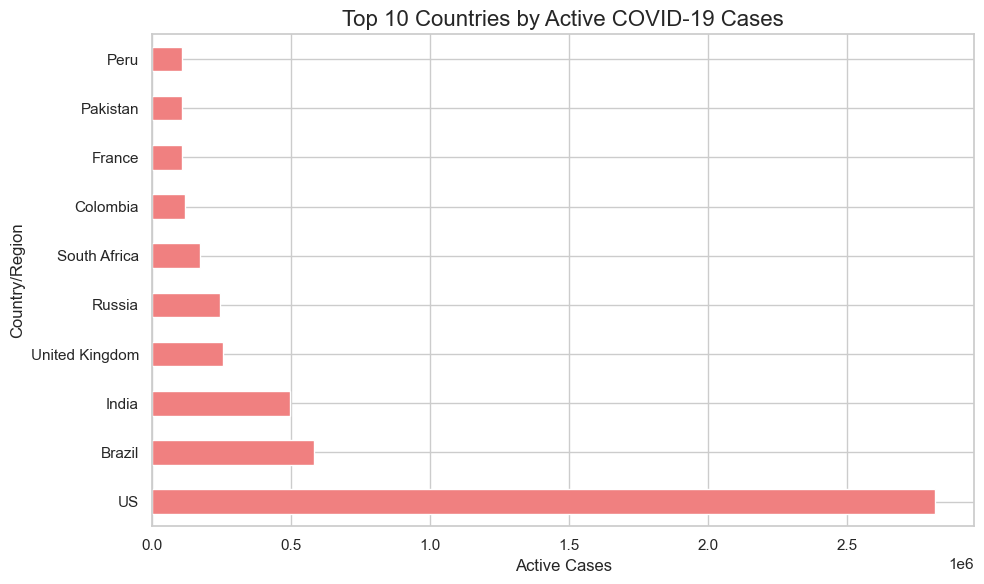

In [58]:
plt.figure(figsize=(10, 6))
top_10_active['Active'].plot(kind='barh', color='lightcoral')
plt.title('Top 10 Countries by Active COVID-19 Cases', fontsize=16)
plt.xlabel('Active Cases', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.tight_layout()
plt.show()

In [59]:
top_10_active_vs_total = df.groupby('Country/Region').agg({'Confirmed': 'max', 'Active': 'max'}).sort_values(by='Confirmed', ascending=False).head(10)

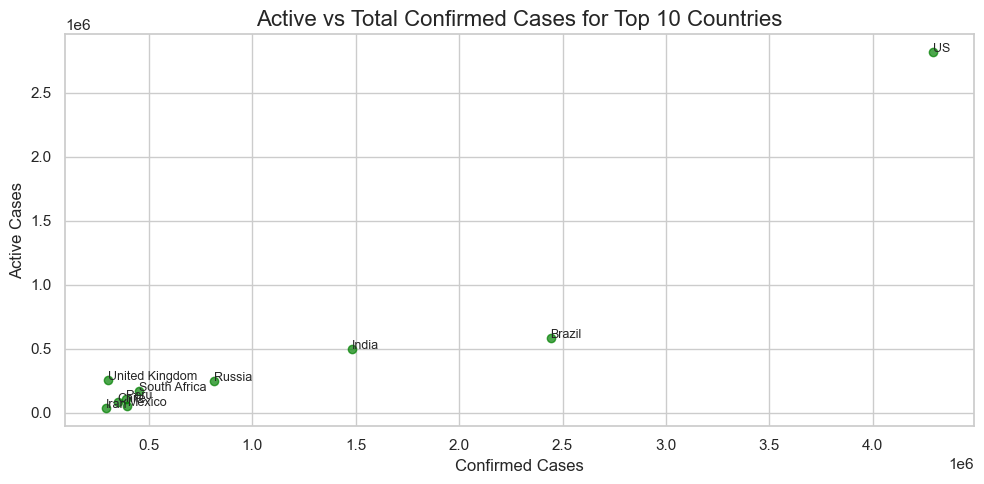

In [60]:
plt.figure(figsize=(10, 5))
plt.scatter(top_10_active_vs_total['Confirmed'], top_10_active_vs_total['Active'], color='green', alpha=0.7)
plt.title('Active vs Total Confirmed Cases for Top 10 Countries', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Active Cases', fontsize=12)
for i, country in enumerate(top_10_active_vs_total.index):
    plt.text(top_10_active_vs_total['Confirmed'][i], top_10_active_vs_total['Active'][i], country, fontsize=9)
plt.tight_layout()
plt.show()

In [61]:
top_10_pie = df.groupby('Country/Region').agg({'Confirmed': 'max', 'Deaths': 'max', 'Recovered': 'max'}).sort_values(by='Confirmed', ascending=False).head(10)

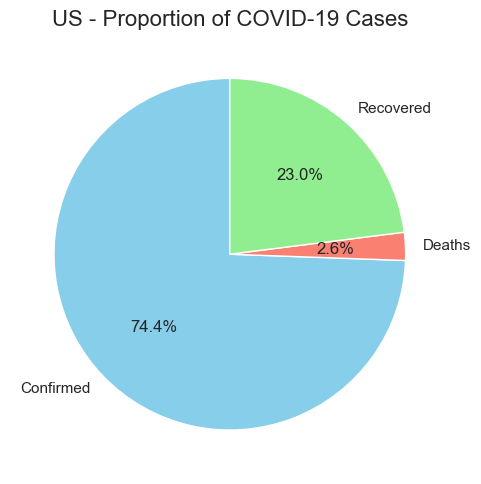

In [62]:
country = top_10_pie.index[0]
country_data = top_10_pie.loc[country][['Confirmed', 'Deaths', 'Recovered']]
labels = country_data.index
sizes = country_data.values

# Plotting pie chart for the first country
plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title(f'{country} - Proportion of COVID-19 Cases', fontsize=16)
plt.tight_layout()
plt.show()

In [75]:
region_deaths = df.groupby('WHO Region')['Deaths'].sum().reset_index()

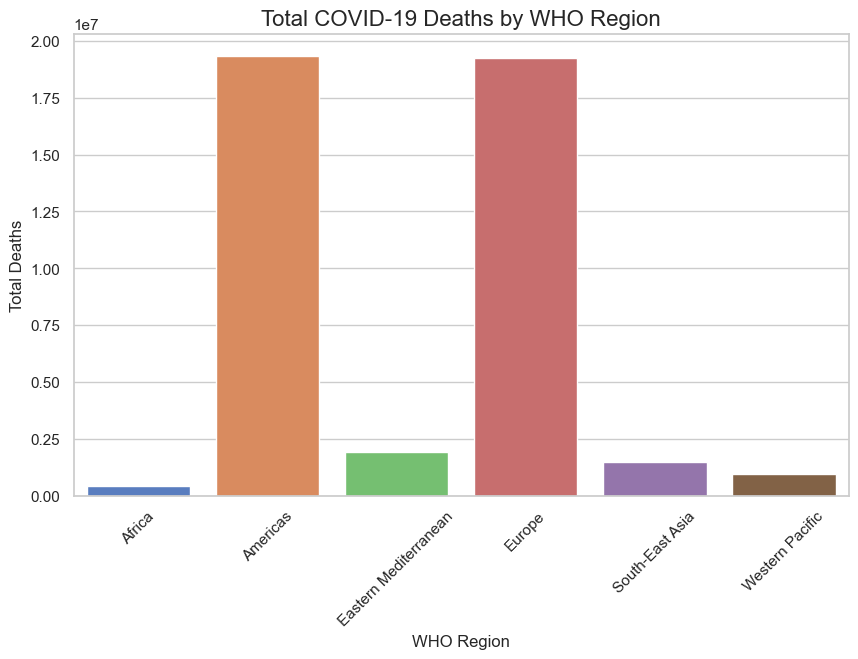

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data=region_deaths, x='WHO Region', y='Deaths', palette='muted')
plt.title('Total COVID-19 Deaths by WHO Region', fontsize=16)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [79]:
country_correlation = df.groupby('Country/Region').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max',
    'Active': 'max',
    'New cases': 'sum',
    'New deaths': 'sum',
    'New recovered': 'sum'
}).corr()

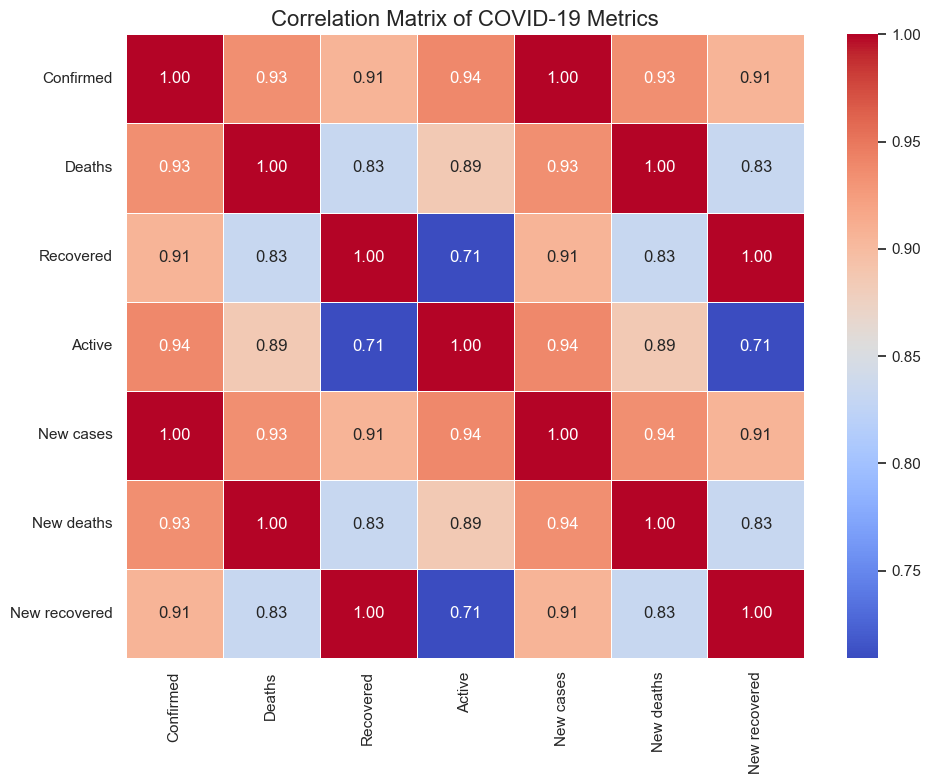

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(country_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of COVID-19 Metrics', fontsize=16)
plt.tight_layout()
plt.show()